# double top

## read data and using zigzag to find pivot point

In [482]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from zigzag import *

In [569]:
df = pd.read_csv("AUD_CAD_D_2005_202206.csv")
X = df['high']
pivots = peak_valley_pivots(X, 0.03, -0.03)

In [570]:
def plot_pivots(X, pivots):
    plt.figure(figsize=(20, 10), dpi= 120, facecolor='w', edgecolor='k')
    plt.xlim(0, len(X))
    plt.ylim(X.min()*0.99, X.max()*1.01)
    plt.plot(np.arange(len(X)), X, 'k:', alpha=0.5)
    plt.plot(np.arange(len(X))[pivots != 0], X[pivots != 0], 'k-')
    plt.scatter(np.arange(len(X))[pivots == 1], X[pivots == 1], color='g')
    plt.scatter(np.arange(len(X))[pivots == -1], X[pivots == -1], color='r')

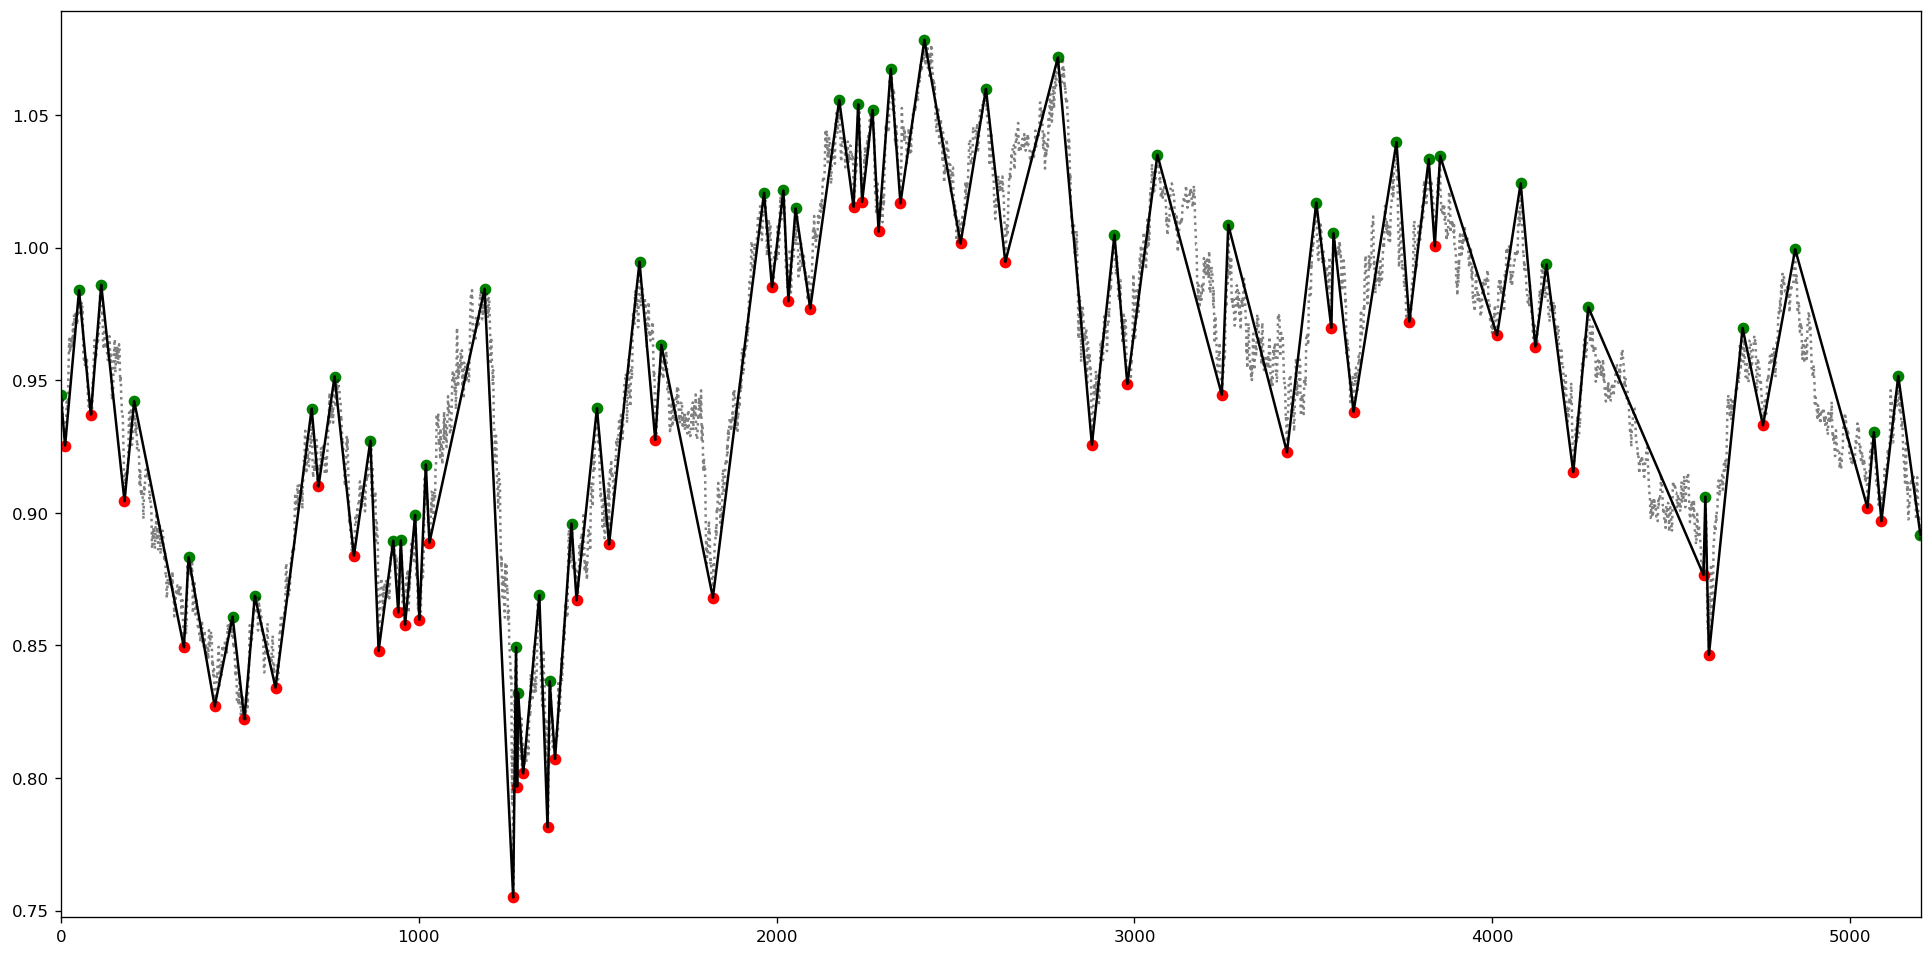

In [571]:
plot_pivots(X, pivots)

In [546]:
peak = compute_segment_returns(X, pivots == PEAK).index.tolist()

## add feature 

In [547]:
df['peak']=np.zeros(len(df))    

In [548]:
for i in range(len(peak)):
    if peak[i]+1<len(df):
        if (0.995*df.high[peak[i+1]] < df.high[peak[i]]) and (df.high[peak[i]] < 1.005*df.high[peak[i+1]]):
            df['peak'][peak[i]]=1
            df['peak'][peak[i+1]]=1
    else:
        print('wrong message')

/var/folders/rd/yqqg0yrj269c9qvj1dmkgvq80000gn/T/ipykernel_2672/4112251900.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/rd/yqqg0yrj269c9qvj1dmkgvq80000gn/T/ipykernel_2672/4112251900.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



wrong message


In [567]:
df.peak[df.peak==1][18:30]

1149    1.0
1174    1.0
1184    1.0
1242    1.0
1245    1.0
1366    1.0
1369    1.0
1390    1.0
1419    1.0
1427    1.0
1678    1.0
1692    1.0
Name: peak, dtype: float64

In [550]:
def twopeak(x):
    if x['peak']==1:
        return x['high']+1e-3
    else:
        return np.nan

In [551]:
df['twopeaks'] = df.apply(lambda row: twopeak(row), axis=1)

## visualization 

In [568]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime
dfpl = df[1100:1200]
fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['open'],
                high=dfpl['high'],
                low=dfpl['low'],
                close=dfpl['close'])])
fig.add_scatter(x=dfpl.index, y=dfpl['twopeaks'], mode="markers",
                marker=dict(size=5, color="blue"),
                name="top point")

fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

# double bottom 

In [498]:
Y = df['low']
pivots = peak_valley_pivots(Y, 0.03, -0.03)

In [499]:
def plot_pivots(Y, pivots):
    plt.figure(figsize=(20, 10), dpi= 120, facecolor='w', edgecolor='k')
    plt.xlim(0, len(X))
    plt.ylim(X.min()*0.99, Y.max()*1.01)
    plt.plot(np.arange(len(X)), X, 'k:', alpha=0.5)
    plt.plot(np.arange(len(X))[pivots != 0], Y[pivots != 0], 'k-')
    plt.scatter(np.arange(len(X))[pivots == 1], Y[pivots == 1], color='g')
    plt.scatter(np.arange(len(X))[pivots == -1], Y[pivots == -1], color='r')

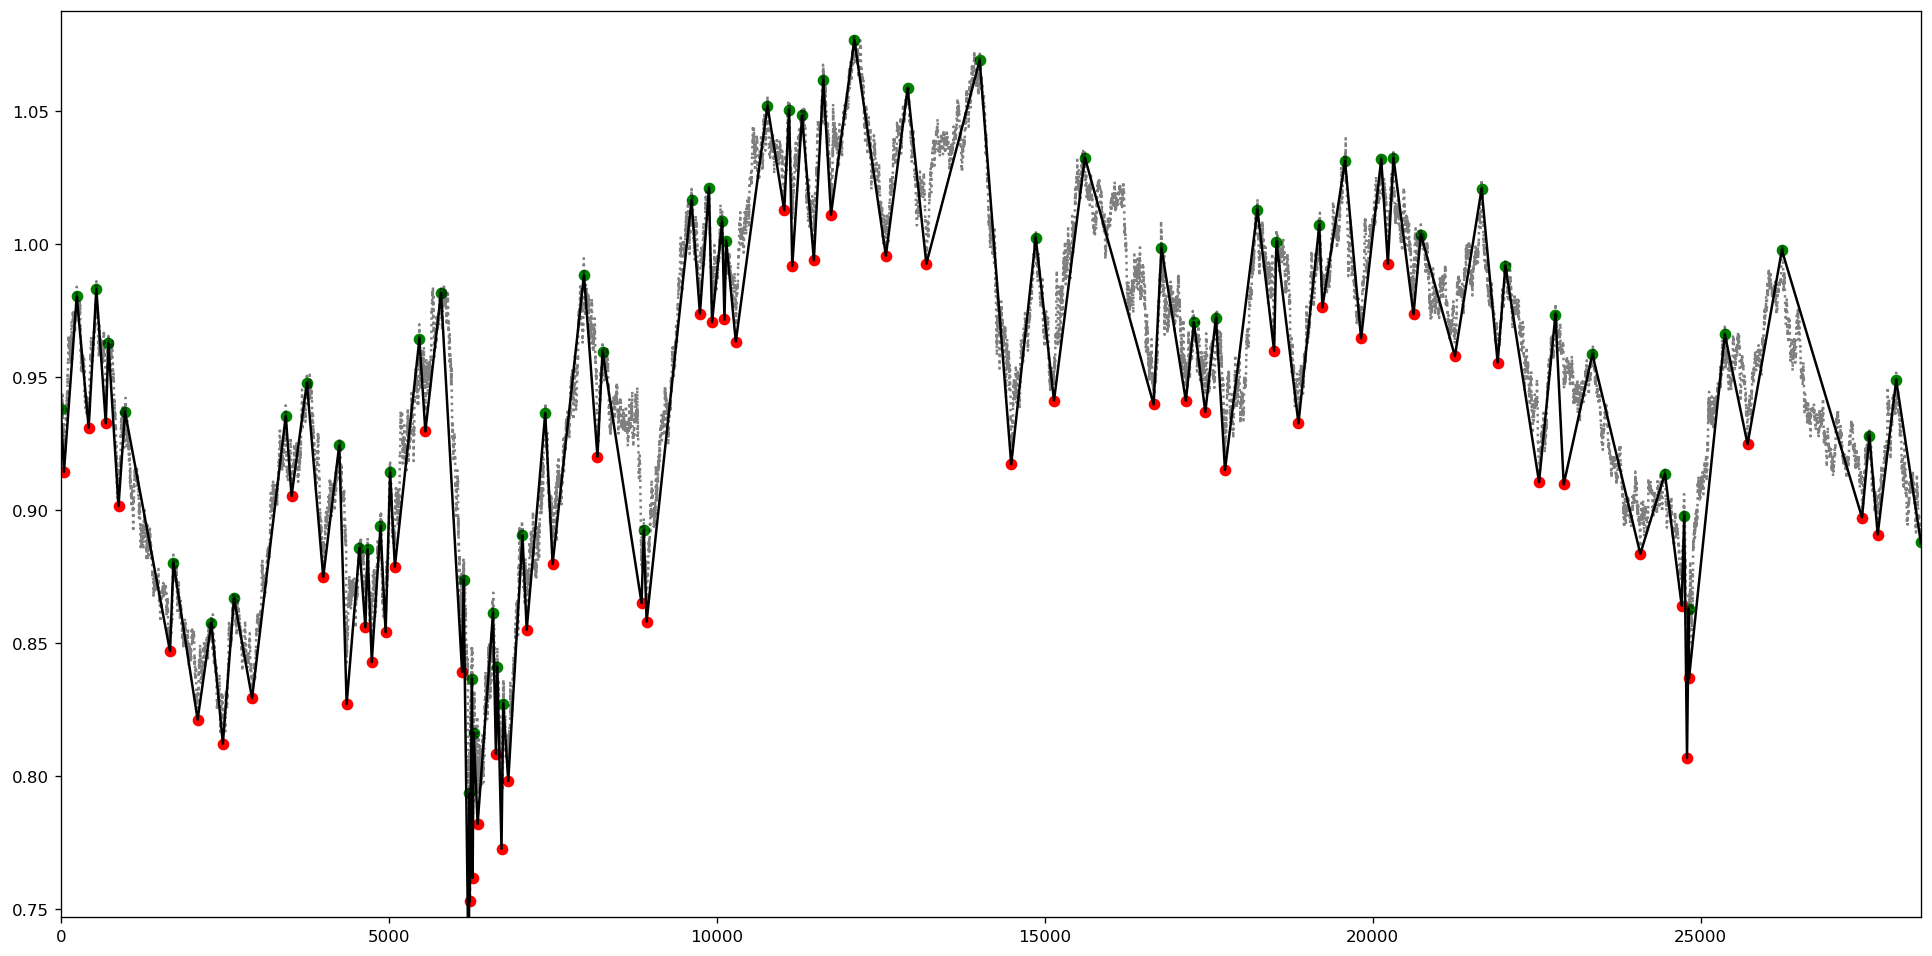

In [500]:
plot_pivots(Y, pivots)

In [501]:
valley = compute_segment_returns(Y, pivots == VALLEY).index.tolist()

## add feature 

In [502]:
df['valley']=np.zeros(len(df)) 

In [520]:
for i in range(len(valley)):
    if i+1<len(valley)-1:
        if (0.995*df.low[valley[i+1]] < df.low[valley[i]]) and (df.low[valley[i]] < 1.005*df.low[valley[i+1]]):
            df['valley'][valley[i]]=2
            df['valley'][valley[i+1]]=2
    else:
        print('wrong message')

/var/folders/rd/yqqg0yrj269c9qvj1dmkgvq80000gn/T/ipykernel_2672/1157674377.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/rd/yqqg0yrj269c9qvj1dmkgvq80000gn/T/ipykernel_2672/1157674377.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



wrong message
wrong message


In [521]:
df.valley[df.valley==2]

425      2.0
686      2.0
9744     2.0
9929     2.0
10118    2.0
11152    2.0
11481    2.0
12579    2.0
13196    2.0
15142    2.0
16661    2.0
17153    2.0
17449    2.0
21254    2.0
21906    2.0
22537    2.0
22913    2.0
Name: valley, dtype: float64

In [531]:
def twovalley(x):
    if x['valley']==2:
        return x['low']-1e-3
    else:
        return np.nan

In [532]:
df['twovalleys'] = df.apply(lambda row: twovalley(row), axis=1)

## visualization 

In [539]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime
dfpl = df[12000:14000]
fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['open'],
                high=dfpl['high'],
                low=dfpl['low'],
                close=dfpl['close'])])
fig.add_scatter(x=dfpl.index, y=dfpl['twovalleys'], mode="markers",
                marker=dict(size=5, color="blue"),
                name="bottom point")

fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()